# Defining the problem statement.

**About Aerofit:**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness
accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing all the necessary classes into the file so that they can help analyze the data easily.

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv


--2024-03-20 04:24:13--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.117, 18.164.173.110, 18.164.173.58, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 04:24:13 (1.90 GB/s) - ‘aerofit.csv’ saved [7279/7279]



In [ ]:
df = pd.read_csv("aerofit.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape

(180, 9)

The .shape function tells us the number of rows and columns in the data frame.
In the given dataframe, we can see that there are 180 rows which means that the aerofit has had 180 pieces of treadmills sold till date.

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


This shows that the oldest peroson to buy the Treadmill is 50 years old and the youngest is 18 years old and the average buyer is ~~29 years old.

Also the average person has 15.5 years of education, their fitness is average that is 3.3, and their income is $53719

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


This data shows us the datatype of all the columns. This tells us that none of the columns are null columns, which is helpful in plotting the data using matplotlib and seaborn classes...

## Non-Graphical Analysis of unique attributes and value count.


**Analysing the product column.**

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

This shows that aerofit has 3 unique types of treadmills.

In [ ]:
df['Product'].value_counts(normalize = True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

This shows that 44% of the total treadmills sold were KP281, 33% of the treadmills were KP481 and the rest is KP781

**Analysing the age column**

In [ ]:
np.sort(df["Age"].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
df["Age"].value_counts(normalize = True)*100

25    13.888889
23    10.000000
24     6.666667
26     6.666667
28     5.000000
35     4.444444
33     4.444444
30     3.888889
38     3.888889
21     3.888889
22     3.888889
27     3.888889
31     3.333333
34     3.333333
29     3.333333
20     2.777778
40     2.777778
32     2.222222
19     2.222222
48     1.111111
37     1.111111
45     1.111111
47     1.111111
46     0.555556
50     0.555556
18     0.555556
44     0.555556
43     0.555556
41     0.555556
39     0.555556
36     0.555556
42     0.555556
Name: Age, dtype: float64

This clearly shows us that the people between the age of 20 - 30 are the people who buy the treadmills the most with people of age 25 being the highest with 13.8%

**Analysis of the gender column**

In [ ]:
df["Gender"].value_counts(normalize = True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

This shows that the majority of customers of Aerofit are male who buy 58% of their products and the rest are female.

**Analysis of eduacation column**

In [ ]:
np.sort(df['Education'].unique())

array([12, 13, 14, 15, 16, 18, 20, 21])

This shows that only people with minimum of 12 years of education only purchase the treadmills.

In [ ]:
unique, counts = np.unique(df["Education"], return_counts = True)
unique, counts

(array([12, 13, 14, 15, 16, 18, 20, 21]),
 array([ 3,  5, 55,  5, 85, 23,  1,  3]))

In [ ]:
df["Education"].value_counts(normalize=True)*100

16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
12     1.666667
21     1.666667
20     0.555556
Name: Education, dtype: float64

From the above, we can clearly deduce that people with 14 and 16 years of education are the highest buyers of treadmills with 30% and 47% of purchases respectively.


**Analysis of the income column**

In [ ]:
np.sort(df["Income"].unique())

array([ 29562,  30699,  31836,  32973,  34110,  35247,  36384,  37521,
        38658,  39795,  40932,  42069,  43206,  44343,  45480,  46617,
        47754,  48556,  48658,  48891,  49801,  50028,  51165,  52290,
        52291,  52302,  53439,  53536,  54576,  54781,  55713,  56850,
        57271,  57987,  58516,  59124,  60261,  61006,  61398,  62251,
        62535,  64741,  64809,  65220,  67083,  68220,  69721,  70966,
        74701,  75946,  77191,  83416,  85906,  88396,  89641,  90886,
        92131,  95508,  95866,  99601, 103336, 104581])

In [ ]:
df["Income"].value_counts(normalize=True)*100Q

45480    7.777778
52302    5.000000
46617    4.444444
54576    4.444444
53439    4.444444
           ...   
65220    0.555556
55713    0.555556
68220    0.555556
30699    0.555556
95508    0.555556
Name: Income, Length: 62, dtype: float64

**Analysis of the usage column**

In [ ]:
df["Usage"].value_counts(normalize=True)*100

3    38.333333
4    28.888889
2    18.333333
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64

**Analysis of the fitness column**


In [ ]:
np.sort(df["Fitness"].unique())

array([1, 2, 3, 4, 5])

In [ ]:
df["Fitness"].value_counts(normalize = True)*100

3    53.888889
5    17.222222
2    14.444444
4    13.333333
1     1.111111
Name: Fitness, dtype: float64

This shows that most of the people who are buying the treadmill consider themselves as average in fitness levels. We also see that people who are not fit mostly do not buy treadmills where as people who consider themselves as fit do tend to buy treadmills.

# **Visual Analysis**
# Univarite Analysis - Categorical Columns.

# **Analysis of distribution of the 3 types of treadmills.**

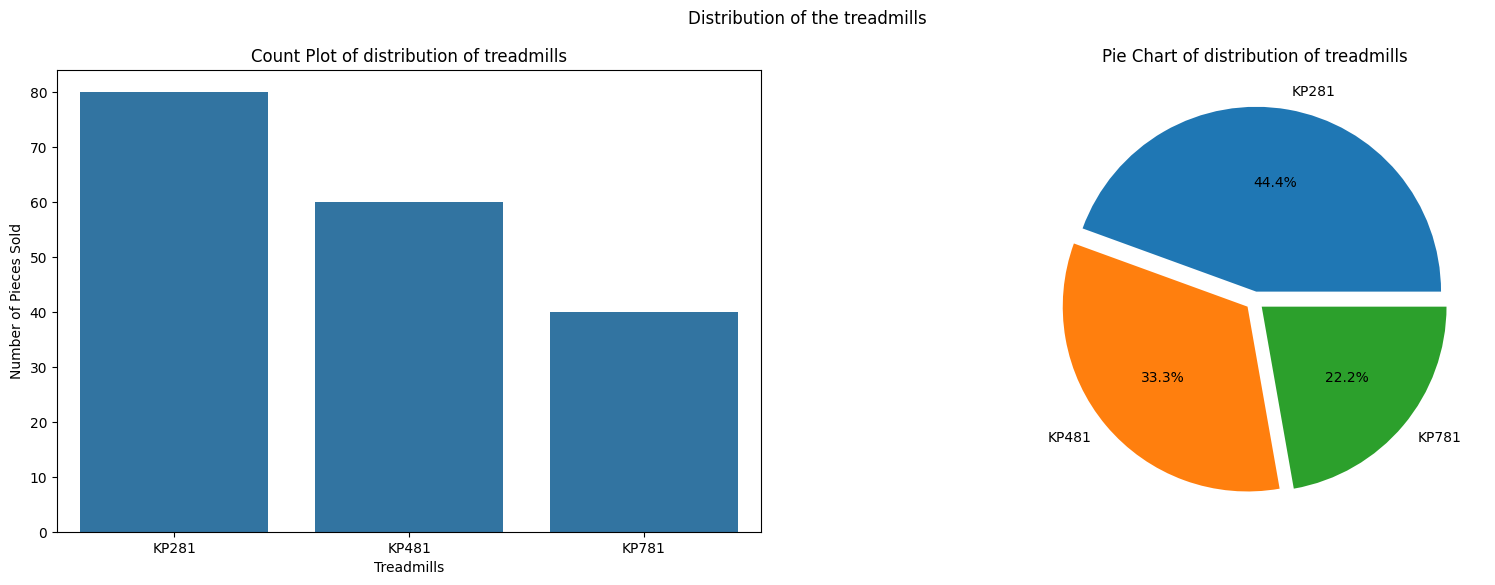

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(20, 6))
figure.suptitle("Distribution of the treadmills")

sns.countplot(data=df, x="Product", ax=axes[0])
axes[0].set_title("Count Plot of distribution of treadmills")
axes[0].set_xlabel("Treadmills")
axes[0].set_ylabel("Number of Pieces Sold")

axes[1].pie(df["Product"].value_counts(), labels=df["Product"].unique(), explode=[0.05]*len(df["Product"].unique()),autopct='%1.1f%%')
axes[1].set_title("Pie Chart of distribution of treadmills")

plt.show()

# Inspiration: https://www.geeksforgeeks.org/how-to-create-subplots-in-seaborn/
# https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

**Insights**




1.   This shows that the most sold treadmill is KP281 which is also the cheapest.

# Distribution of Gender

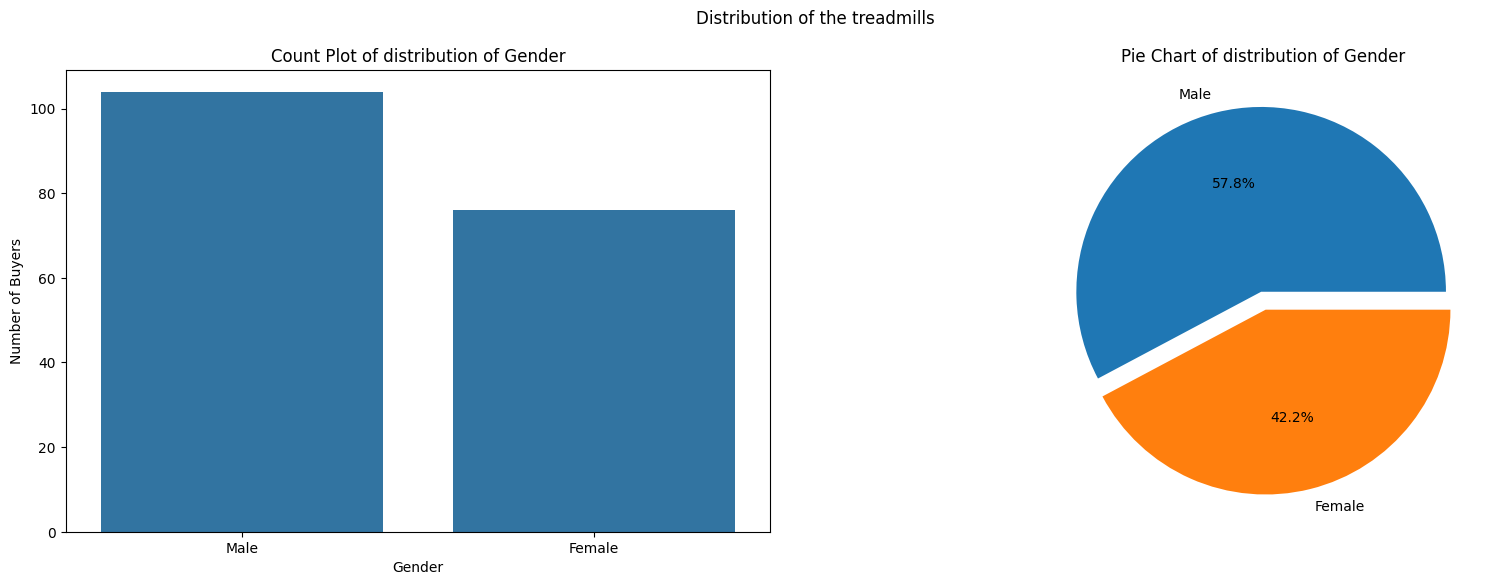

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(20, 6))
figure.suptitle("Distribution of the treadmills")

sns.countplot(data=df, x="Gender", ax=axes[0])
axes[0].set_title("Count Plot of distribution of Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of Buyers")

axes[1].pie(df["Gender"].value_counts(), labels=df["Gender"].unique(), explode=[0.05]*len(df["Gender"].unique()),autopct='%1.1f%%')
axes[1].set_title("Pie Chart of distribution of Gender")

plt.show()

# Insights


1.   The Gender distribution is more dominant towards male than female
2.   Almost 58% of AeroFit's customer base is male.
3.   The rest 42% are female.



# Distribution of mariatal status

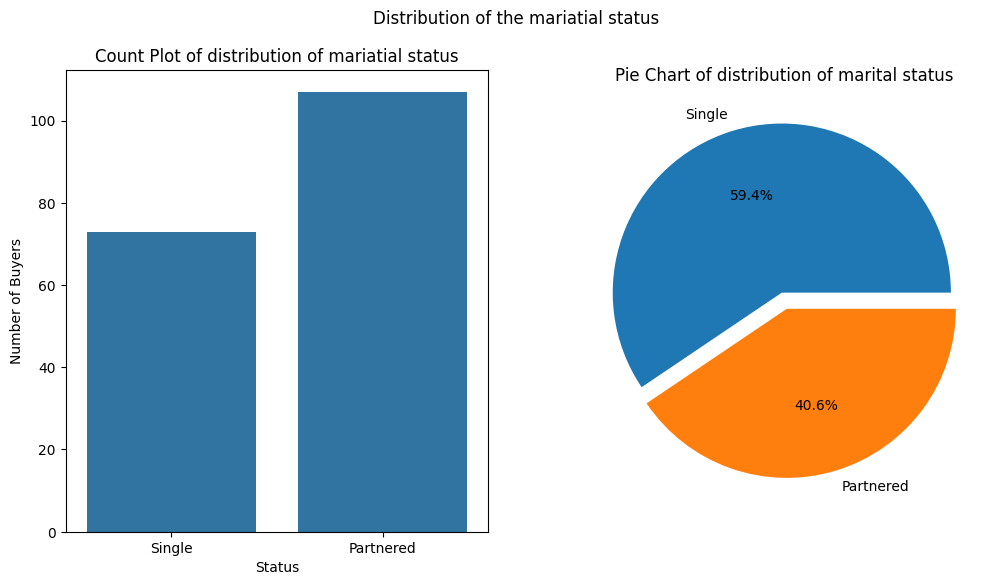

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
figure.suptitle("Distribution of the mariatal status")

sns.countplot(data=df, x="MaritalStatus", ax=axes[0])
axes[0].set_title("Count Plot of distribution of mariatal status")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Number of Buyers")

axes[1].pie(df["MaritalStatus"].value_counts(), labels=df["MaritalStatus"].unique(), explode=[0.05]*len(df["MaritalStatus"].unique()),autopct='%1.1f%%')
axes[1].set_title("Pie Chart of distribution of marital status")

plt.show()

# Insights

Almost 60% of AeroFit's customers are married and the rest 40% are unmarried.

# Univariate Analysis - Numeric Columns

# Distribution of age

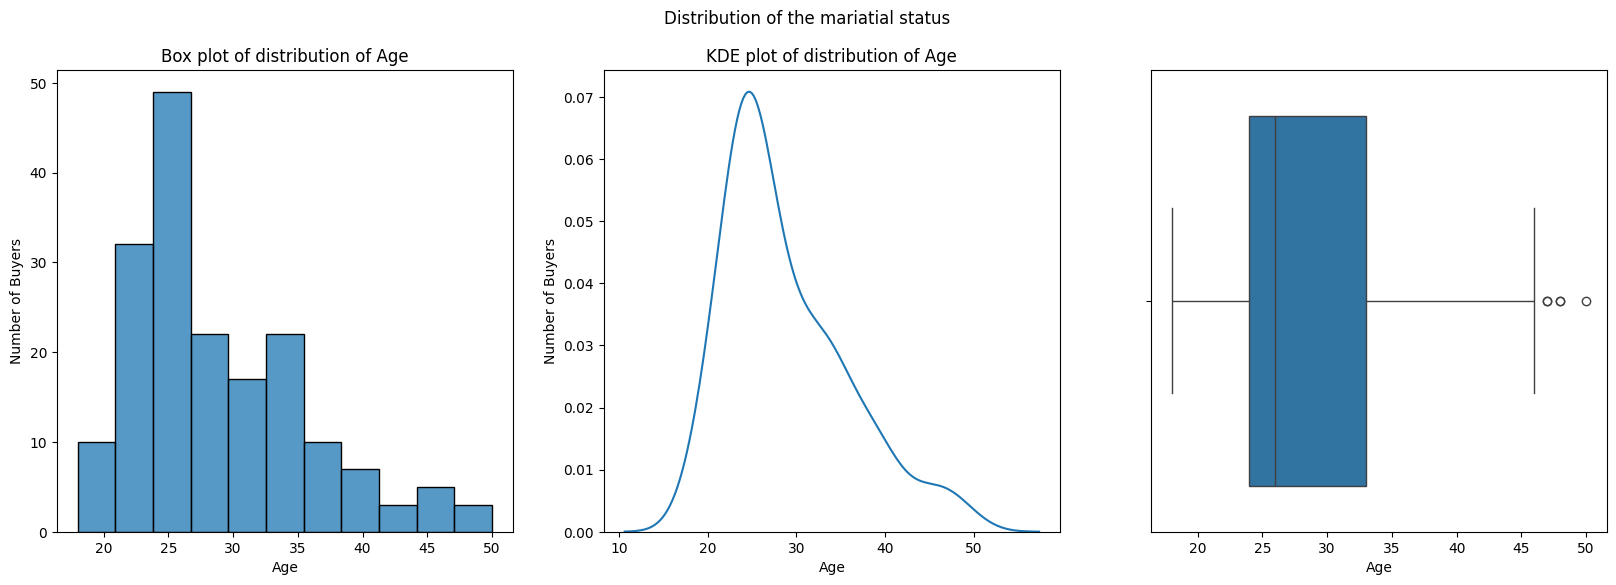

In [ ]:
# @title
figure, axes = plt.subplots(1, 3, figsize=(20, 6))
figure.suptitle("Distribution of Age")

sns.histplot(data=df, x="Age", ax=axes[0])
axes[0].set_title("Hist plot of distribution of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of Buyers")

sns.kdeplot(data = df, x = "Age", ax=axes[1])
axes[1].set_title("KDE plot of distribution of Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of Buyers")

sns.boxplot(data = df, x = "Age", ax=axes[2])
axes[2].set_title("Box plot of distribution of Age")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Number of Buyers")


plt.show()

# Insights


1. Most of AeroFit's customers are young people between the age of 21 - 30.
2. This age group takes over 35% of the customer base of the company.
3. The age group 31 - 40 takes about 30% of the customer base.



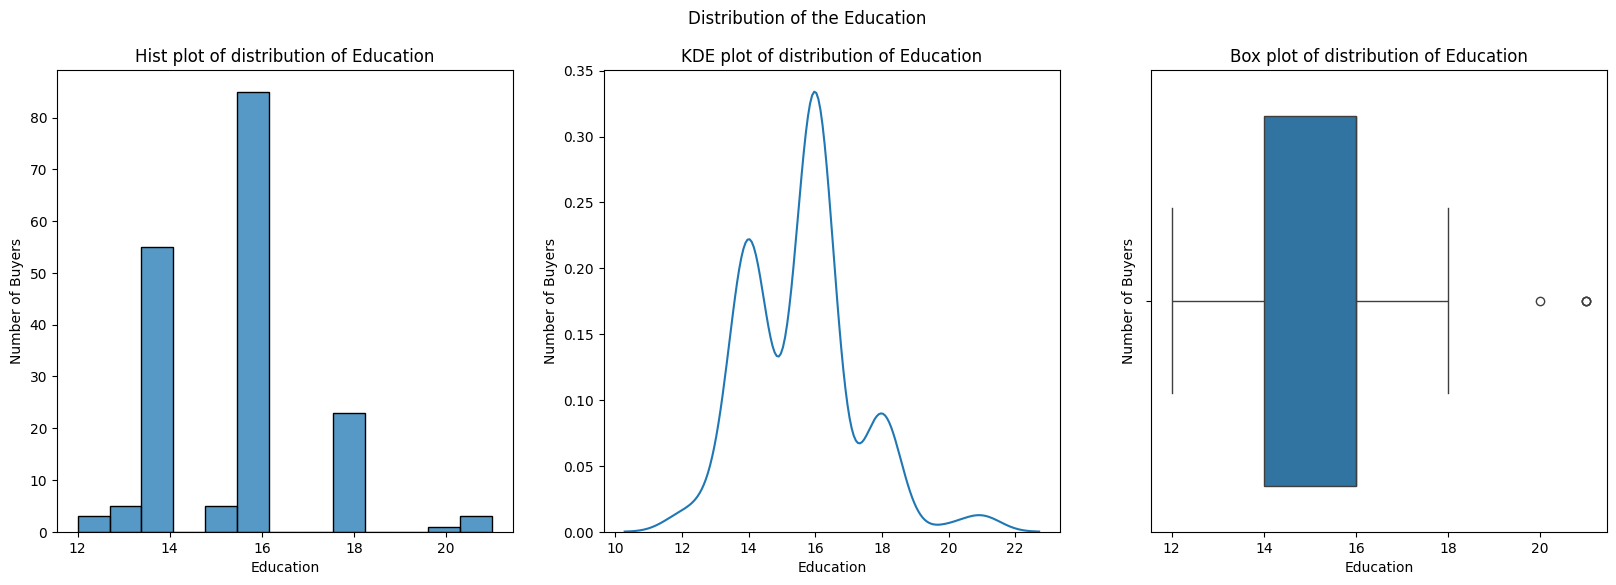

In [ ]:
figure, axes = plt.subplots(1, 3, figsize=(20, 6))
figure.suptitle("Distribution of the Education")

sns.histplot(data=df, x="Education", ax=axes[0])
axes[0].set_title("Hist plot of distribution of Education")
axes[0].set_xlabel("Education")
axes[0].set_ylabel("Number of Buyers")

sns.kdeplot(data = df, x = "Education", ax=axes[1])
axes[1].set_title("KDE plot of distribution of Education")
axes[1].set_xlabel("Education")
axes[1].set_ylabel("Number of Buyers")

sns.boxplot(data = df, x = "Education", ax=axes[2])
axes[2].set_title("Box plot of distribution of Education")
axes[2].set_xlabel("Education")
axes[2].set_ylabel("Number of Buyers")


plt.show()

# Insights.

This clearly shows that the people with 14 - 16 years of education purchase treadmills more frequently than others. The purchases stop at about 18 years of education with just a few outliers.

The groups 16 and 14 take about 48% and 30% of customer base respectively.

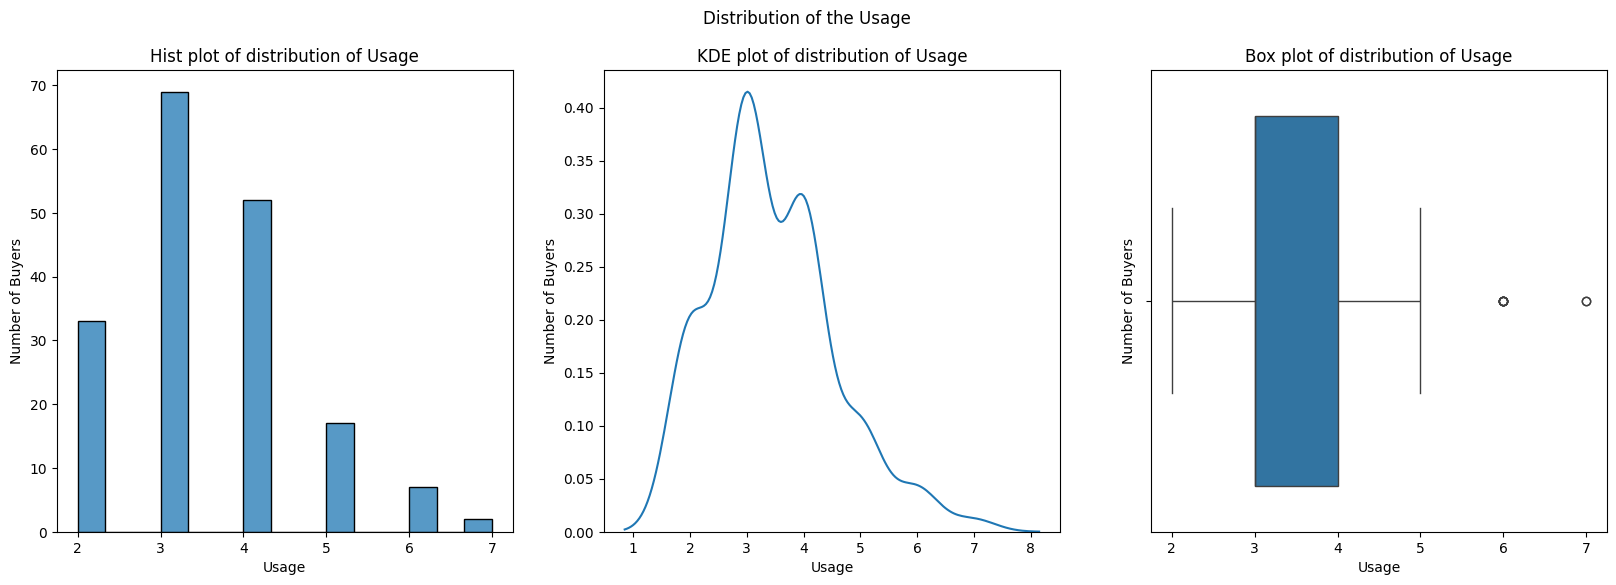

In [ ]:
figure, axes = plt.subplots(1, 3, figsize=(20, 6))
figure.suptitle("Distribution of the Usage")

sns.histplot(data=df, x="Usage", ax=axes[0])
axes[0].set_title("Hist plot of distribution of Usage")
axes[0].set_xlabel("Usage")
axes[0].set_ylabel("Number of Buyers")

sns.kdeplot(data = df, x = "Usage", ax=axes[1])
axes[1].set_title("KDE plot of distribution of Usage")
axes[1].set_xlabel("Usage")
axes[1].set_ylabel("Number of Buyers")

sns.boxplot(data = df, x = "Usage", ax=axes[2])
axes[2].set_title("Box plot of distribution of Usage")
axes[2].set_xlabel("Usage")
axes[2].set_ylabel("Number of Buyers")


plt.show()

# Insights

The above show us that people who intend to use the treadmill 3  - 4 times a week purchase them.

Infact this group takes about 70% of the customer base.


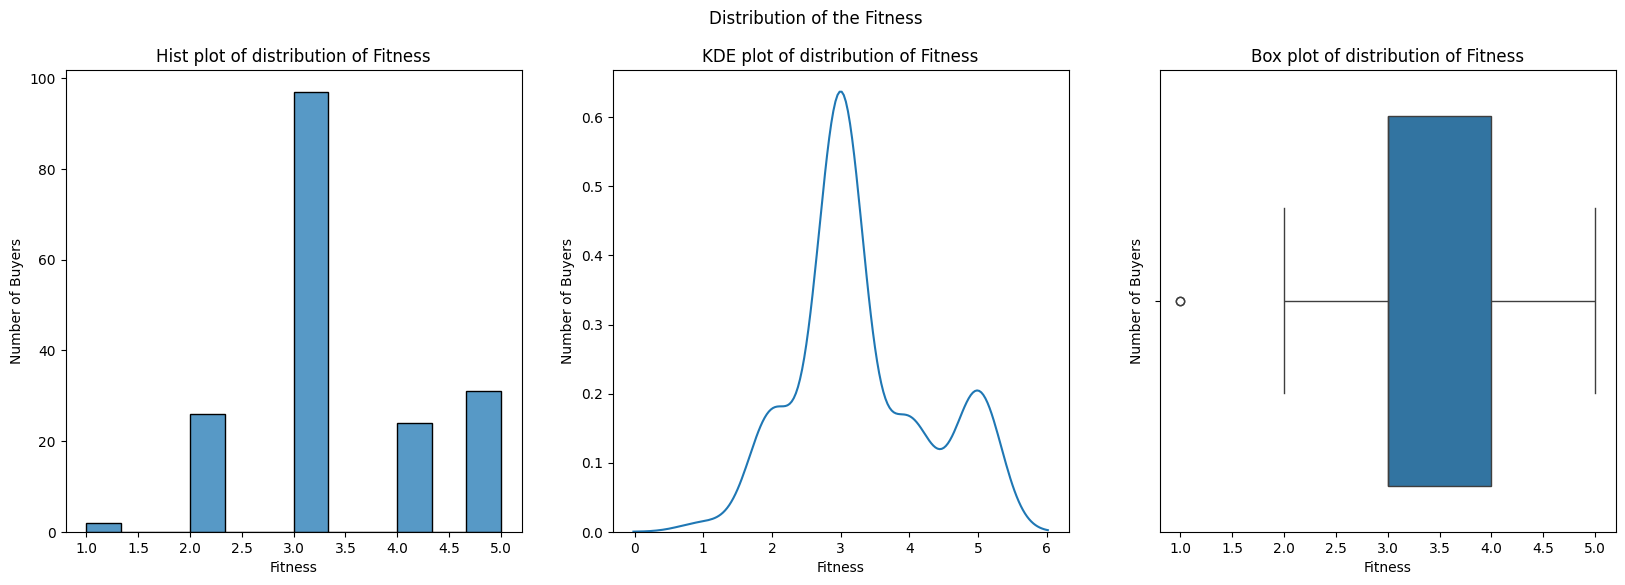

In [ ]:
figure, axes = plt.subplots(1, 3, figsize=(20, 6))
figure.suptitle("Distribution of the Fitness")

sns.histplot(data=df, x="Fitness", ax=axes[0])
axes[0].set_title("Hist plot of distribution of Fitness")
axes[0].set_xlabel("Fitness")
axes[0].set_ylabel("Number of Buyers")

sns.kdeplot(data = df, x = "Fitness", ax=axes[1])
axes[1].set_title("KDE plot of distribution of Fitness")
axes[1].set_xlabel("Fitness")
axes[1].set_ylabel("Number of Buyers")

sns.boxplot(data = df, x = "Fitness", ax=axes[2])
axes[2].set_title("Box plot of distribution of Fitness")
axes[2].set_xlabel("Fitness")
axes[2].set_ylabel("Number of Buyers")


plt.show()

# Insights.

These show us that the average buyer puts themselves as a average person in terms of fitness.

It can also be noticed that unfit people do not buy treadmills except 1 outlier.

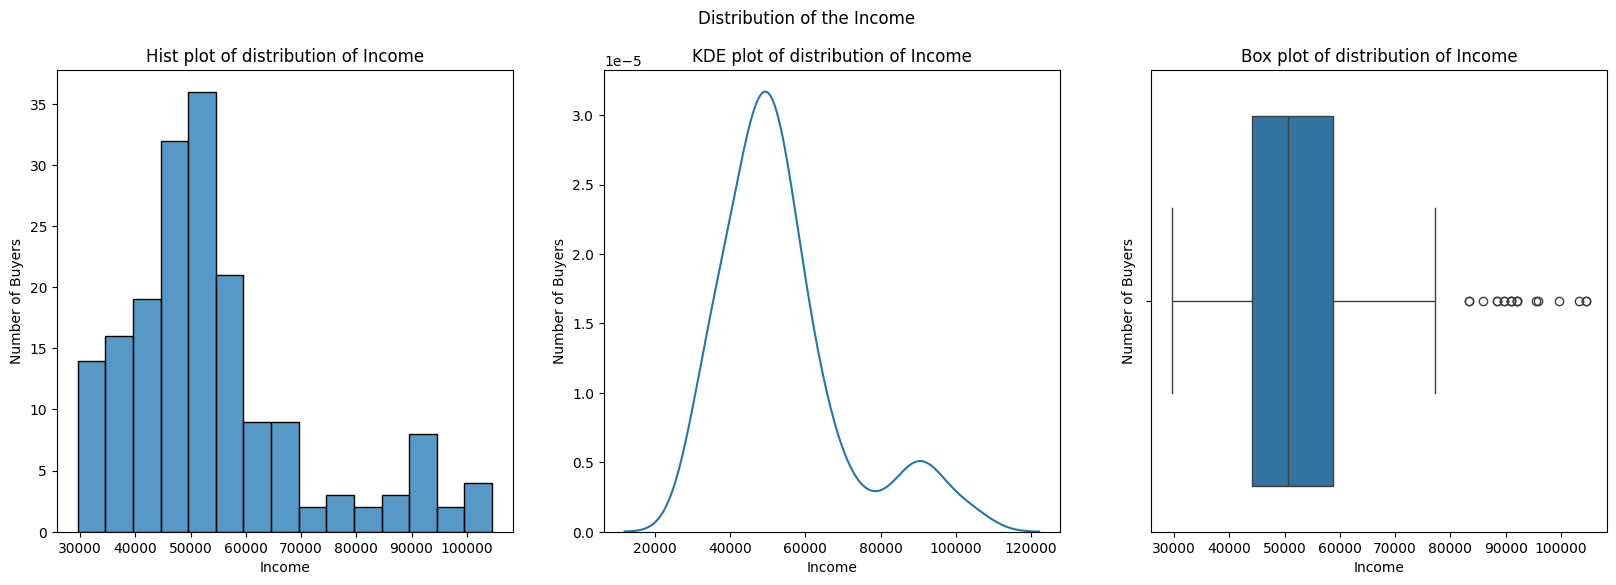

In [ ]:
figure, axes = plt.subplots(1, 3, figsize=(20, 6))
figure.suptitle("Distribution of the Income")

sns.histplot(data=df, x="Income", ax=axes[0])
axes[0].set_title("Hist plot of distribution of Income")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Number of Buyers")

sns.kdeplot(data = df, x = "Income", ax=axes[1])
axes[1].set_title("KDE plot of distribution of Income")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("Number of Buyers")

sns.boxplot(data = df, x = "Income", ax=axes[2])
axes[2].set_title("Box plot of distribution of Income")
axes[2].set_xlabel("Income")
axes[2].set_ylabel("Number of Buyers")


plt.show()

#Insight

Here it can be seen that people in the income range of 40,000 too 60,000 buy the most treadmills.
It can also be seen that people above the income of 70,000 are not too keen in purchasing treadmills.

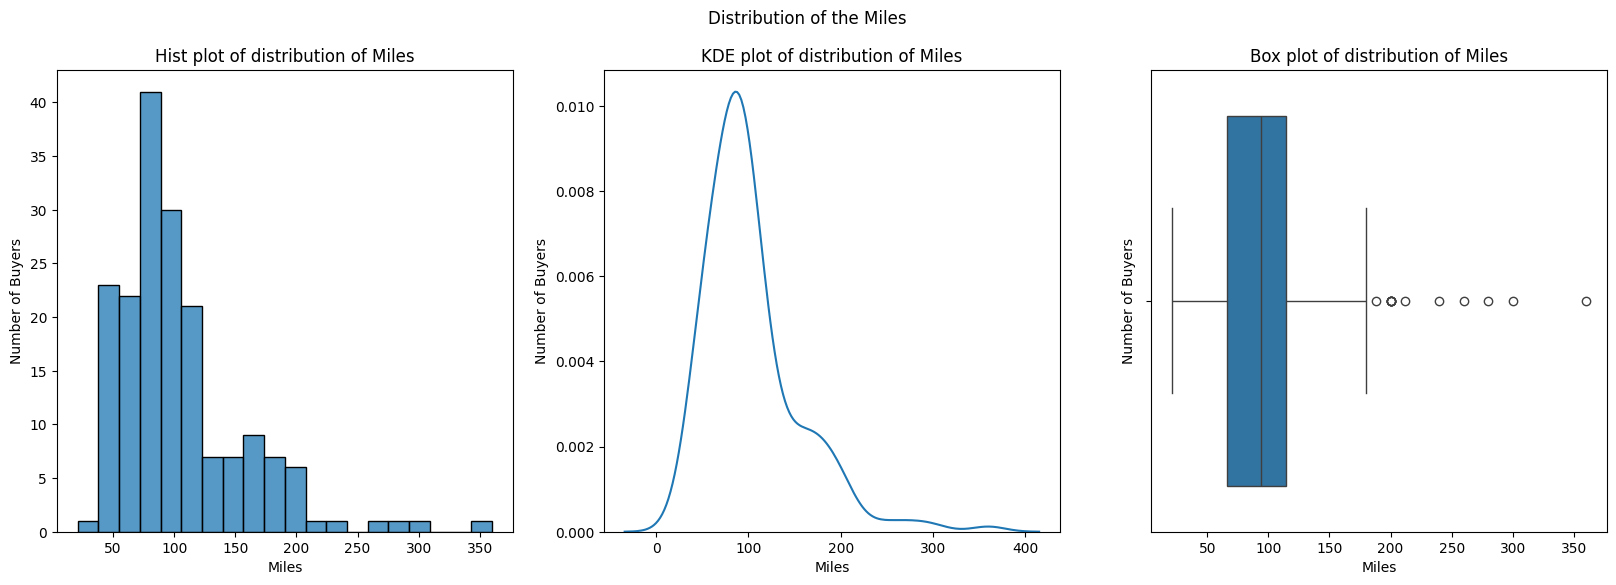

In [ ]:
figure, axes = plt.subplots(1, 3, figsize=(20, 6))
figure.suptitle("Distribution of the Miles")

sns.histplot(data=df, x="Miles", ax=axes[0])
axes[0].set_title("Hist plot of distribution of Miles")
axes[0].set_xlabel("Miles")
axes[0].set_ylabel("Number of Buyers")

sns.kdeplot(data = df, x = "Miles", ax=axes[1])
axes[1].set_title("KDE plot of distribution of Miles")
axes[1].set_xlabel("Miles")
axes[1].set_ylabel("Number of Buyers")

sns.boxplot(data = df, x = "Miles", ax=axes[2])
axes[2].set_title("Box plot of distribution of Miles")
axes[2].set_xlabel("Miles")
axes[2].set_ylabel("Number of Buyers")


plt.show()

# Recommendations:

1. Aerofit should focus on their female as well as unmarried customer base.
  * These are huge market places and they haven't been able to capitalize it properly.
2. They should also focus on teenagers as well as elderly people and should focus on marketing the pros of using treadmills and sttaying fit.
3. While aerofit has a huge amount of educated people, they should also focus on getting the people who have more thatn 17 years of education. They should also focus on getting the people with less than 12 years of eduaction. They should market the uses of treasdmills in fitness in  simple language to those with less education.
4. They should also focus on getting the people with income above 70,000.
They are a huge customer base for their premium machines.
5. They should also focus on increasing the sales of thier medium and premium modelks as they are trailing compared to the basic model.




# Bivariate Analysis

# Distribution of treadmills w.r.t. gender

In [ ]:
grouping_gender = df.groupby(["Product", "Gender"]).size().unstack()
print(grouping_gender)

Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33


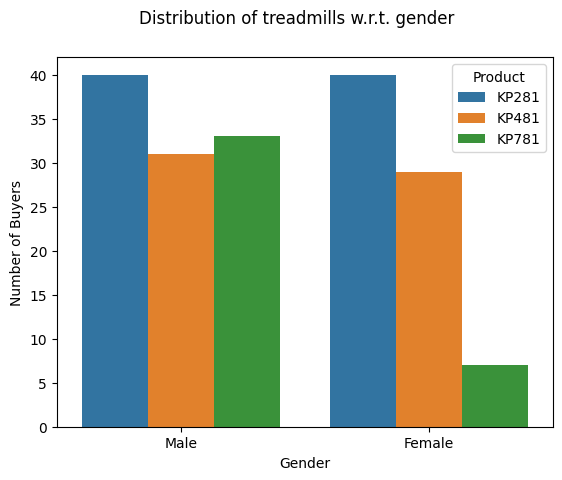

In [ ]:
sns.countplot(data = df, x = "Gender", hue = "Product")

plt.suptitle("Distribution of treadmills w.r.t. gender")
plt.xlabel("Gender")
plt.ylabel("Number of Buyers")


plt.show()

# Distribution of treadmills w.r.t. marital status

# Insight

This shows that in male and in female, KP281 which is the budget-frinedly model is the most popular, but in the mens section, KP781 which is the high-end model, is slightly more popular than the mid-renge KP481 model.

In [ ]:
grouping_marrige_status = df.groupby(["Product", "MaritalStatus"]).size().unstack()
print(grouping_marrige_status)

MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17


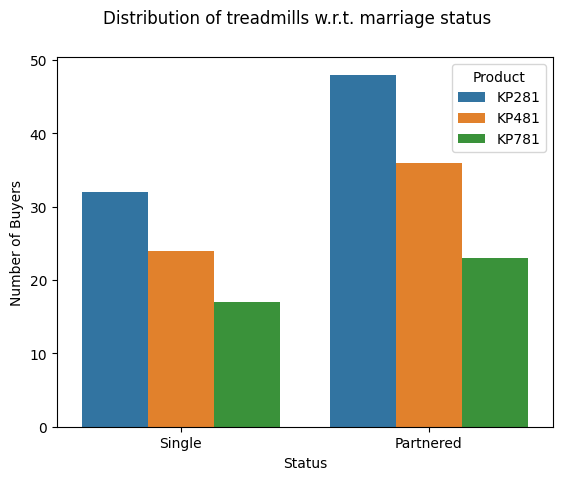

In [ ]:
sns.countplot(data = df, x = "MaritalStatus", hue = "Product")

plt.suptitle("Distribution of treadmills w.r.t. marriage status")
plt.xlabel("Status")
plt.ylabel("Number of Buyers")


plt.show()

# Distribution of treadmills w.r.t. number of miles

# Insight

In the above graph we can see that irrespective of the marital status, the trend in the purchase of different models remains the same that is KP291 is the most sold, KP481 has average sales and KP781 is the least sold model.

In [ ]:
grouping_age = df.groupby(["Product", "Miles"]).size().unstack()
print(grouping_age)

Miles    21   38   42   47   53   56   64    66   74    75   ...  170  180  \
Product                                                      ...             
KP281    NaN  3.0  NaN  9.0  NaN  6.0  NaN  10.0  NaN  10.0  ...  NaN  NaN   
KP481    1.0  NaN  4.0  NaN  7.0  NaN  6.0   NaN  3.0   NaN  ...  2.0  NaN   
KP781    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  1.0  6.0   

Miles    188  200  212  240  260  280  300  360  
Product                                          
KP281    1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
KP481    NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  
KP781    NaN  6.0  NaN  1.0  1.0  1.0  1.0  1.0  

[3 rows x 37 columns]


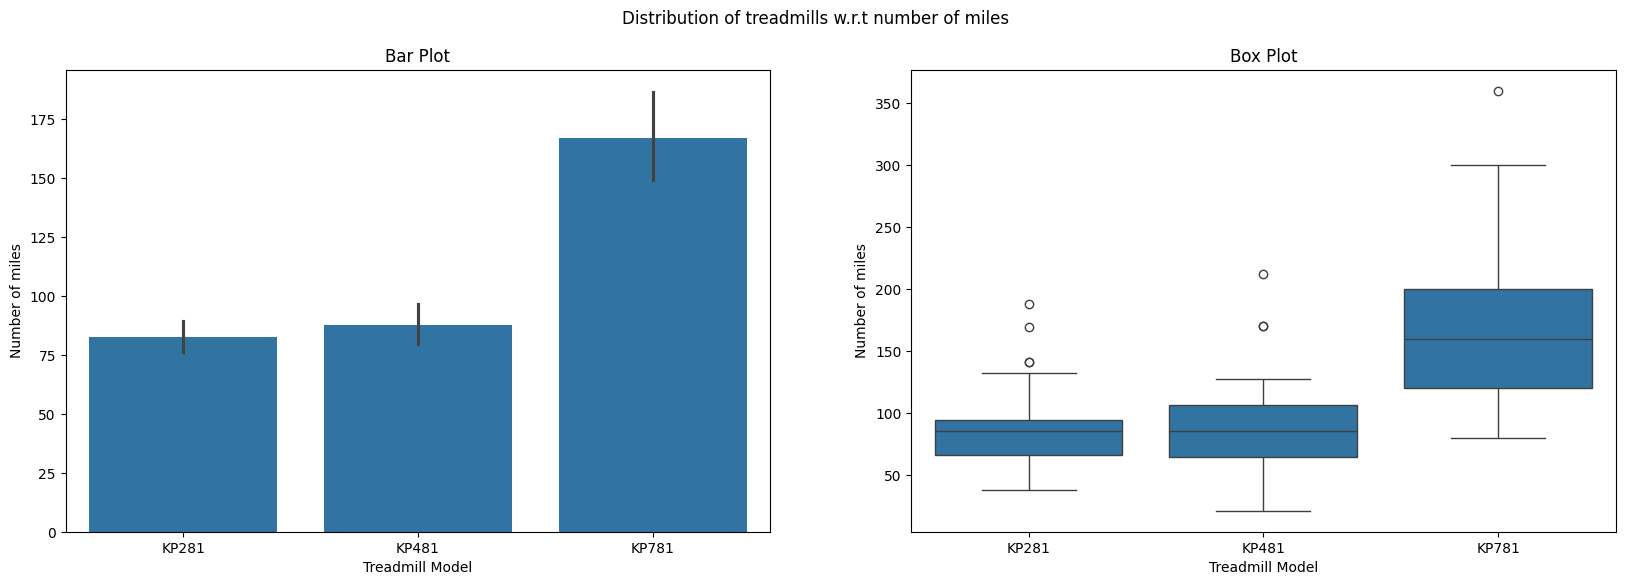

In [ ]:
figure, axis = plt.subplots(1,2,figsize = (20, 6))
figure.suptitle("Distribution of treadmills w.r.t number of miles")

sns.barplot(data = df, x = df["Product"], y = df["Miles"], ax= axis[0])
axis[0].set_xlabel("Treadmill Model")
axis[0].set_ylabel("Number of miles")
axis[0].set_title("Bar Plot")

sns.boxplot(data = df, x = df["Product"], y = df["Miles"], ax= axis[1])
axis[1].set_xlabel("Treadmill Model")
axis[1].set_ylabel("Number of miles")
axis[1].set_title("Box Plot")

plt.show()

# Distribution of treadmills w.r.t. fitness

# Insight

These plots show us that the people who use the premium model have the most amount of miles on the treadmill.
Similarly, the people who have the least amount of miles are the ones with the most basic model.





In [ ]:
grouping_fitness = df.groupby(["Product", "Fitness"]).size().unstack();
grouping_fitness

Fitness,1,2,3,4,5
Product,,,,,
KP281,1.0,14.0,54.0,9.0,2.0
KP481,1.0,12.0,39.0,8.0,NaN
KP781,NaN,NaN,4.0,7.0,29.0


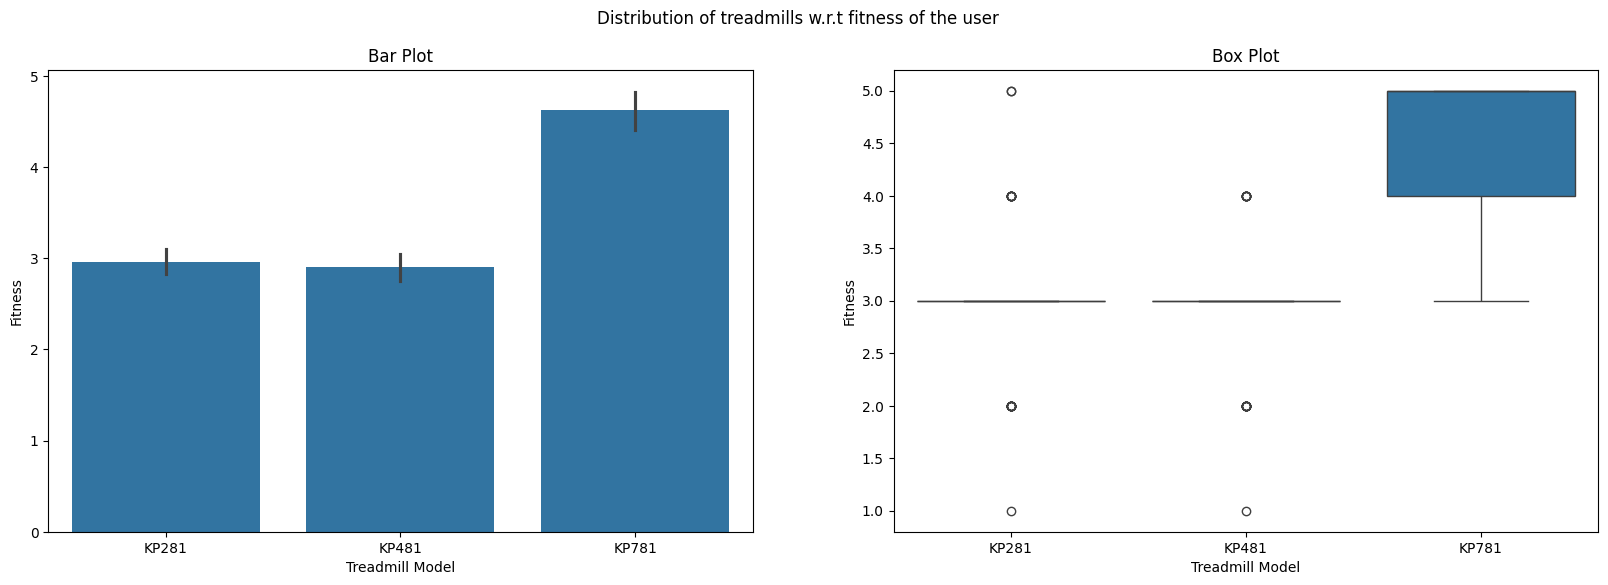

In [ ]:
figure, axis = plt.subplots(1,2,figsize = (20, 6))
figure.suptitle("Distribution of treadmills w.r.t fitness of the user")

sns.barplot(data = df, x = df["Product"], y = df["Fitness"], ax= axis[0])
axis[0].set_xlabel("Treadmill Model")
axis[0].set_ylabel("Fitness")
axis[0].set_title("Bar Plot")

sns.boxplot(data = df, x = df["Product"], y = df["Fitness"], ax= axis[1])
axis[1].set_xlabel("Treadmill Model")
axis[1].set_ylabel("Fitness")
axis[1].set_title("Box Plot")

plt.show()

#Insight

The above plots give a lot of information about the buyers of the treadmills.
People who think that their fitness is average or below mostly buy the KP281, KP481 models as they are just starting out.

But the people who theing they are more than average in terms of fitness only buy KP781 model except a few outliers.

# Distribution of treadmills w.r.t. usage

In [ ]:
grouping_usage = df.groupby(["Product", "Usage"]).size().unstack()
grouping_usage

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,19.0,37.0,22.0,2.0,NaN,NaN
KP481,14.0,31.0,12.0,3.0,NaN,NaN
KP781,NaN,1.0,18.0,12.0,7.0,2.0


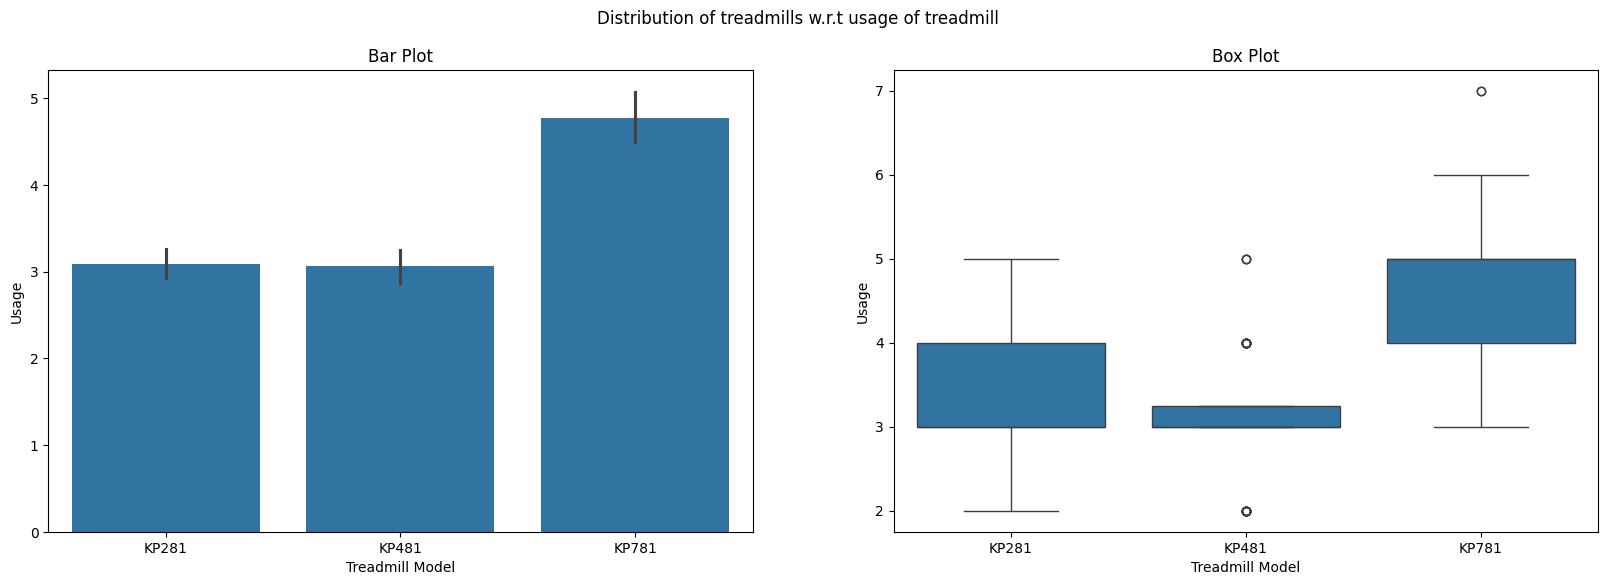

In [ ]:
figure, axis = plt.subplots(1,2,figsize = (20, 6))
figure.suptitle("Distribution of treadmills w.r.t usage of treadmill")

sns.barplot(data = df, x = df["Product"], y = df["Usage"], ax= axis[0])
axis[0].set_xlabel("Treadmill Model")
axis[0].set_ylabel("Usage")
axis[0].set_title("Bar Plot")

sns.boxplot(data = df, x = df["Product"], y = df["Usage"], ax= axis[1])
axis[1].set_xlabel("Treadmill Model")
axis[1].set_ylabel("Usage")
axis[1].set_title("Box Plot")

plt.show()

# Insight

These plots also have a similar result as previous plots, where the users with the most premium models have the highest usage where as the users with the other models have significantly lower usage...

# Distribution of treadmill w.r.t. income

To effcively compute this, we will add a new column to the dataframe called IncomeRange in which the buyers will be classified in to 3 categories,

1. Lower Class - 29,000 to 50,000
2. Middle Class - 50,001 to 80,000
3. Upper Class - 80,000 - 110,000


In [ ]:
df["IncomeGroup"] = pd.cut(df["Income"], bins = [29000, 50000, 80000, 110000], labels = ["Lower", "Middle", "Upper"])
grouping_income_group = df.groupby(["Product", "IncomeGroup"]).size().unstack()
grouping_income_group

IncomeGroup,Lower,Middle,Upper
Product,,,
KP281,48,32,0
KP481,30,30,0
KP781,5,16,19


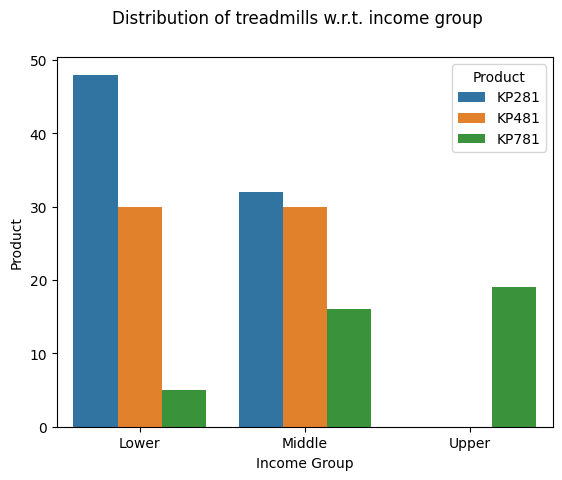

In [ ]:
sns.countplot(data = df, x = "IncomeGroup", hue = "Product")

plt.suptitle("Distribution of treadmills w.r.t. income group")
plt.xlabel("Income Group")
plt.ylabel("Product")


plt.show()

# Insight

In the data we can clearly see that the most basic models are really popular in lower and middle classes. But as the income groups improve, we see a rapid increase in the purchase of the middle and premium models.

#Distribution of treadmills w.r.t. age

To analyze the age, we also group ages like we did with income to make 3 groups.

1.  Young - 18 - 29
2.  Middle - 30 - 39
3.  Old - 40 - 50

In [ ]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[17, 29, 39, 51], labels = ["Young", "Middle", "Old"]);
df["AgeGroup"]
grouping_age = df.groupby(["Product","AgeGroup"]).size().unstack()
grouping_age

AgeGroup,Young,Middle,Old
Product,,,
KP281,53,20,7
KP481,33,22,5
KP781,27,8,5


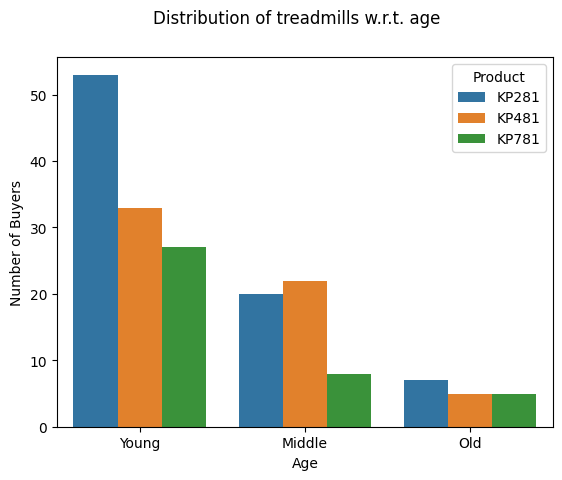

In [ ]:
sns.countplot(data = df, x = "AgeGroup", hue = "Product")

plt.suptitle("Distribution of treadmills w.r.t. age")
plt.xlabel("Age")
plt.ylabel("Number of Buyers")


plt.show()

# Insights

Here, wee can see that the most basic model is popular in all three age groups but in the middle group, the KP481 model is more popular than any other model. And the premium model is really popular in young and old age groups.

# **Recommendations**

1. The sales team should focus on selling the premium products to the female customers as the sales of the premium product to females is really low.

2. There is no comment on the sales related to marital status but focus on selling to the singles should be increased.

3. The miles and fitness levels on the basic and mid-range model are ok but the premium model is extraordinary. So from the next time if the customer meets the high miles and fitness levels categories, focus should be put on converting them to premium customers.

4. The same goes for the usage as well as income range of the buyers.

5. In age groups, young people must be pushed towards the middle-range products so that they can be converted to premium customers few years down the line.



# **Heatmap**

<ipython-input-39-42189a235b83>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = '.2f')


<Axes: >

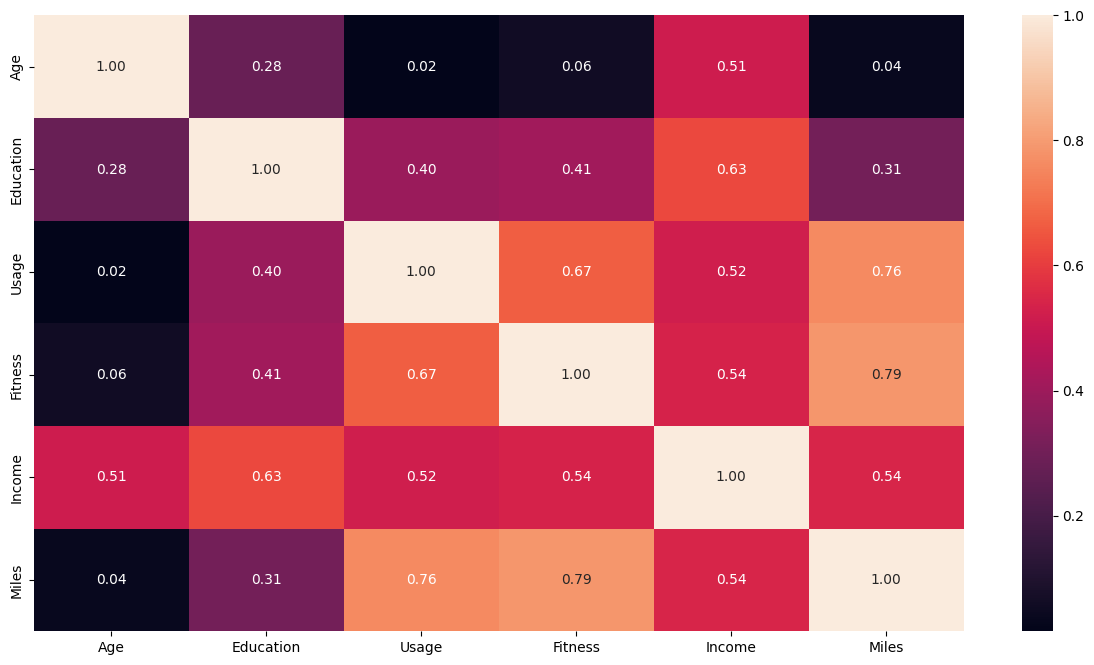

In [ ]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, fmt = '.2f')

# Insights

1. We can clearly see that the fitness levels, income, miles and usage of the treadmills have a close connection with each other which is understandable as a person who has high income priortizes their health and thus the result.

2. There is also good relation between education and age of 0.28. This shows that as the age of the person increases, his eduaton level also tends to increase.

3. There is also a connection between education and the four 3 fitness related columns (Usage, miles and fitness) and income.

4. While there is no relation between age and fitness columns, age has a very positive relation with income.

# Probabilities

#Relation between product and gender.

In [ ]:
cross_tab = pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True, normalize=True, margins_name='Total').round(2)
cross_tab

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


# **Marginal Probabilites**

P(KP281) = 0.44

P(KP481) = 0.33

P(KP781) = 0.22

P(Male)  = 0.58

P(Female)= 0.42

# **Conditional Probabilities**

P(KP281 | Male) = 0.22

P(KP281 | Female) = 0.22

P(KP481 | Male) = 0.17

P(KP481 | Female) = 0.16

P(KP781 | Male) = 0.18

P(KP781 | Female) = 0.04


#Relation between product and marital status.

In [ ]:
cross_tab = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True, normalize=True, margins_name='Total').round(2)
cross_tab

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


# **Marginal Probabilites**

P(KP281) = 0.44

P(KP481) = 0.33

P(KP781) = 0.22

P(Partnered)  = 0.59

P(Single)= 0.41

# **Conditional Probabilities**

P(KP281 | Partnered) = 0.27

P(KP281 | Single) = 0.18

P(KP481 | Partnered) = 0.20

P(KP481 | Single) = 0.13

P(KP781 | Partnered) = 0.13

P(KP781 | Single) = 0.09


#Relation between product and income group.

In [ ]:
cross_tab = pd.crosstab(index=df['Product'], columns=df['IncomeGroup'], margins=True, normalize=True, margins_name='Total').round(2)
cross_tab

IncomeGroup,Lower,Middle,Upper,Total
Product,,,,
KP281,0.27,0.18,0.00,0.44
KP481,0.17,0.17,0.00,0.33
KP781,0.03,0.09,0.11,0.22
Total,0.46,0.43,0.11,1.00


# **Marginal Probabilites**

P(KP281) = 0.44

P(KP481) = 0.33

P(KP781) = 0.22

P(Lower) = 0.46

P(Middle)= 0.43

P(Upper)= 0.11

# **Conditional Probabilities**

P(KP281 | Lower) = 0.27

P(KP281 | Middle) = 0.18

P(KP281 | Upper) = 0.00

P(KP481 | Lower) = 0.17

P(KP481 | Middle) = 0.17

P(KP481 | Upper) = 0.00

P(KP781 | Lower) = 0.03

P(KP781 | Middle) = 0.09

P(KP781 | Upper) = 0.11


#Relation between product and income group.

In [ ]:
cross_tab = pd.crosstab(index=df['Product'], columns=df['AgeGroup'], margins=True, normalize=True, margins_name='Total').round(2)
cross_tab

AgeGroup,Young,Middle,Old,Total
Product,,,,
KP281,0.29,0.11,0.04,0.44
KP481,0.18,0.12,0.03,0.33
KP781,0.15,0.04,0.03,0.22
Total,0.63,0.28,0.09,1.00


# **Marginal Probabilites**

P(KP281) = 0.44

P(KP481) = 0.33

P(KP781) = 0.22

P(Young) = 0.63

P(Middle)= 0.28

P(Old)= 0.09

# **Conditional Probabilities**

P(KP281 | Young) = 0.29

P(KP281 | Middle) = 0.11

P(KP281 | Old) = 0.04

P(KP481 | Young) = 0.18

P(KP481 | Middle) = 0.12

P(KP481 | Old) = 0.03

P(KP781 | Young) = 0.15

P(KP781 | Middle) = 0.04

P(KP781 | Old) = 0.03


# **Customer Profiling**

Customers Of KP281


*   Age: 19 - 40
*   Gender: Both male and female
*   Marital Staus: Both
*   Usage: ~3 days a week
*   Fitness: 3
*   Income: 29,000 - 80,000
*   Miles: ~ 80 miles.



Customers Of KP481


*   Age: 19 - 50
*   Gender: Both male and female
*   Marital Staus: Both
*   Usage: ~3 days a week
*   Fitness: 3
*   Income: 29,000 - 80,000
*   Miles: ~ 80 miles.



Customers Of KP781


*   Age: 19 - 50
*   Gender: Both male and female
*   Marital Staus: Both
*   Usage: ~5 days a week
*   Fitness: 4.5
*   Income: 50,000 - 110,000
*   Miles: ~ 175 miles.


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo